In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('italy-covid-daywise.csv')

In [5]:
df.tail(10)

,date,new_cases,new_deaths,new_tests
238,2020-08-25,953.0,4.0,45798.0
239,2020-08-26,876.0,4.0,58054.0
240,2020-08-27,1366.0,13.0,57640.0
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [6]:
df.shape

(248, 4)

In [7]:
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [11]:
columns_list = df.columns.tolist()
columns_list

['date', 'new_cases', 'new_deaths', 'new_tests']

In [14]:
df[df['new_cases']>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [20]:
#create positive_rate column that is equal to new_cases / new_tests
df['positive_rate'] = df['new_cases']/df['new_tests']
df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [21]:
df.drop(columns=['positive_rate'], inplace=True)
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [22]:
df.sort_values(by=['new_cases'], ascending=False)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [23]:
df['date'].dtypes

dtype('O')

In [36]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [50]:
daylist=[]
month=[]
year=[]
weekday=[]
for day in df['date']:
    daylist.append(day.day)
    weekday.append(day.dayofweek)
    month.append(day.month)
    year.append(day.year)
    

In [51]:
df['day']=daylist
df['month']=month
df['year']=year
df['weekday']=weekday

In [52]:
df

,date,new_cases,new_deaths,new_tests,day,weekday,month,year
0,2019-12-31,0.0,0.0,NaN,31,1,12,2019
1,2020-01-01,0.0,0.0,NaN,1,2,1,2020
2,2020-01-02,0.0,0.0,NaN,2,3,1,2020
3,2020-01-03,0.0,0.0,NaN,3,4,1,2020
4,2020-01-04,0.0,0.0,NaN,4,5,1,2020
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,6,8,2020
244,2020-08-31,1365.0,4.0,42583.0,31,0,8,2020
245,2020-09-01,996.0,6.0,54395.0,1,1,9,2020
246,2020-09-02,975.0,8.0,NaN,2,2,9,2020


In [60]:
df[df['month']==5][['new_cases', 'new_deaths', 'new_tests']].sum()




new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [70]:
day_with_most_cases = df[df['month'] == 5]['new_cases']
day_with_most_cases.max()
df[df['new_cases'] == day_with_most_cases.max()]['date']

123   2020-05-02
Name: date, dtype: datetime64[ns]

In [71]:
#create a new dataframe with month-wise data
df_month = df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
df_month

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


<Axes: xlabel='date'>

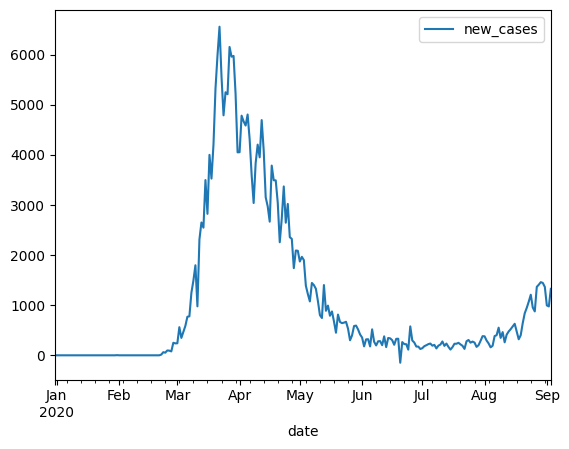

In [73]:

#plot a line graph showing how the number of daily cases varies over time.
df.plot(kind='line', x='date', y='new_cases')

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>
<xsl:stylesheet version="1.0" xmlns:xsl="http://www.w3.org/1999/XSL/Transform">
    <xsl:output method="text" encoding="UTF-8"/>

    <xsl:template match="/">
        <xsl:text>SID,firstName,lastName,date&#10;</xsl:text>
        <xsl:apply-templates select="students/student"/>
    </xsl:template>

    <xsl:template match="student">
        <xsl:value-of select="@SID"/>
        <xsl:text>,</xsl:text>
        <xsl:value-of select="firstName"/>
        <xsl:text>,</xsl:text>
        <xsl:value-of select="lastName"/>
        <xsl:text>,</xsl:text>
        <xsl:value-of select="date"/>
        <xsl:text>&#10;</xsl:text>
    </xsl:template>

</xsl:stylesheet>
